In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('C:/Users/DELL/OneDrive/DATA Science/predict price kaggle/train.csv')
test_data = pd.read_csv('C:/Users/DELL/OneDrive/DATA Science/predict price kaggle/test.csv')

In [3]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
num_col = train_data.select_dtypes(include=np.number).columns
obj_col = train_data.select_dtypes(exclude=np.number).columns

In [6]:
num_col=num_col[1:]

In [7]:
train_data[num_col].describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [8]:
train_data[obj_col].describe()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


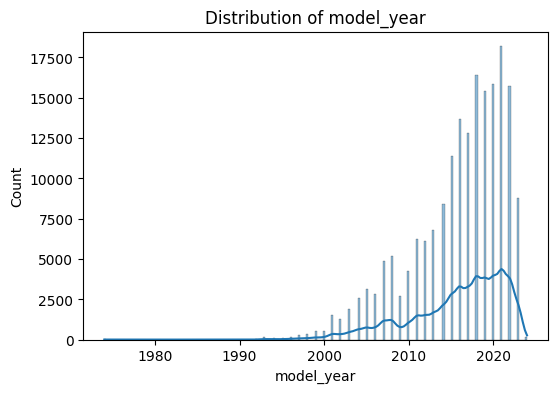

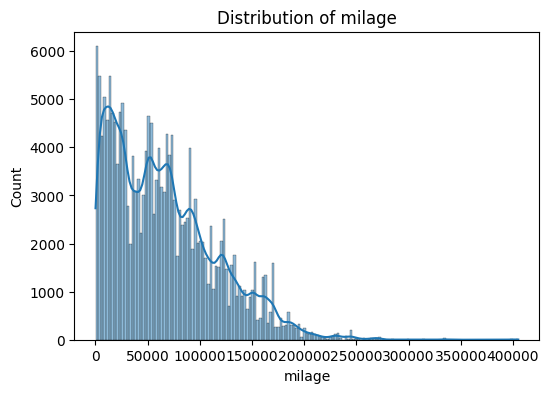

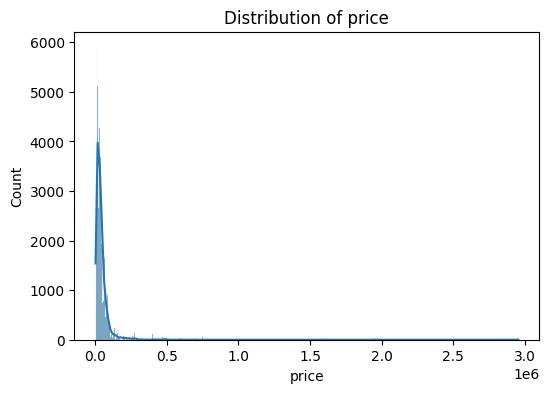

In [9]:
for column in num_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


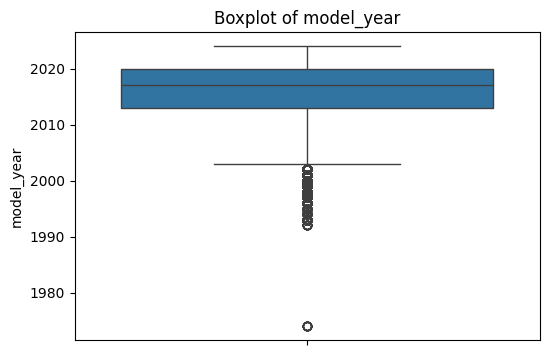

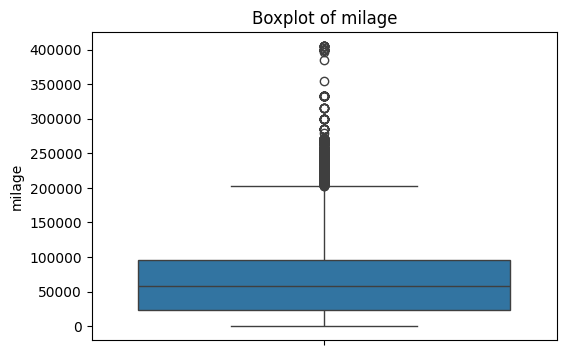

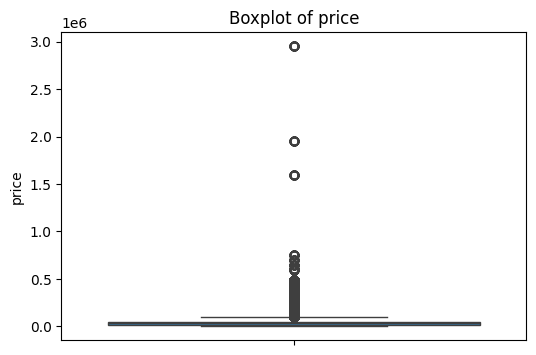

In [10]:
for column in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(train_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

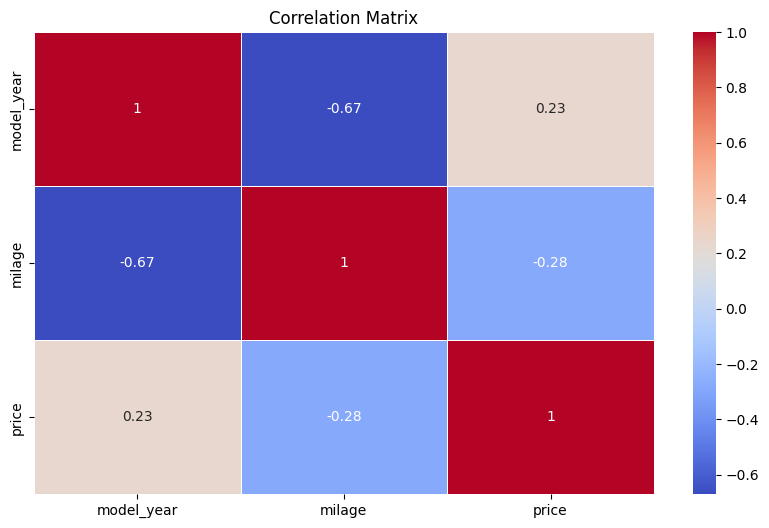

In [11]:
plt.figure(figsize=(10, 6))
correlation_matrix = train_data[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

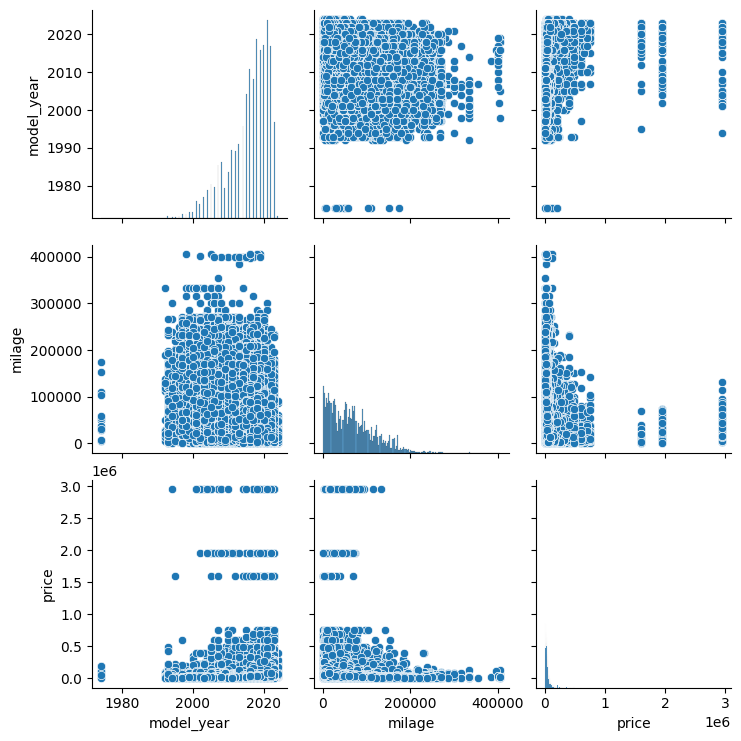

In [12]:
sns.pairplot(train_data[num_col])
plt.show()

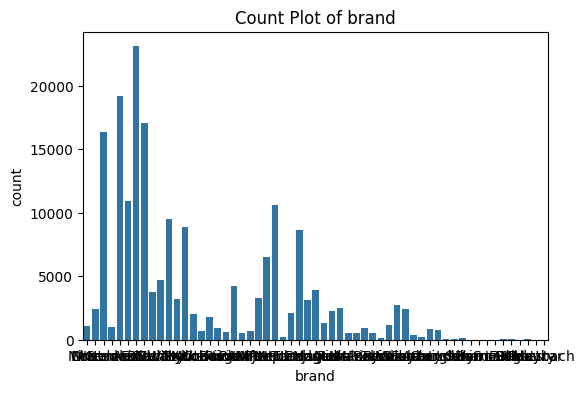

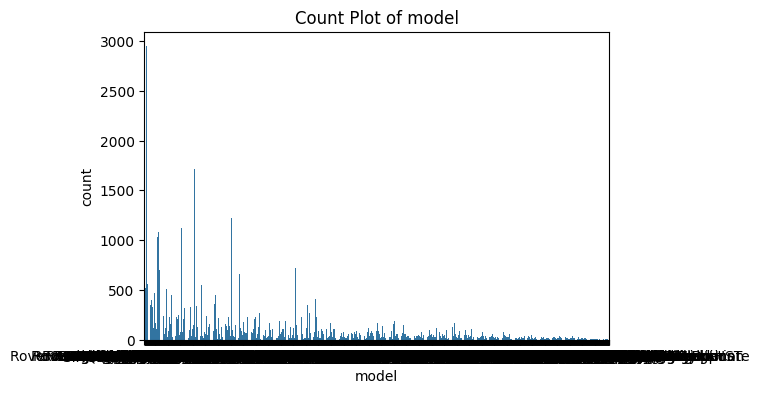

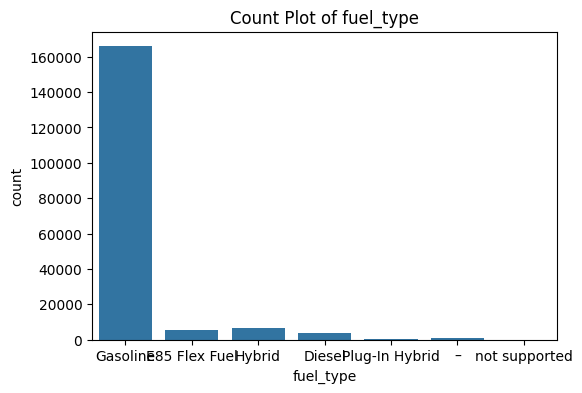

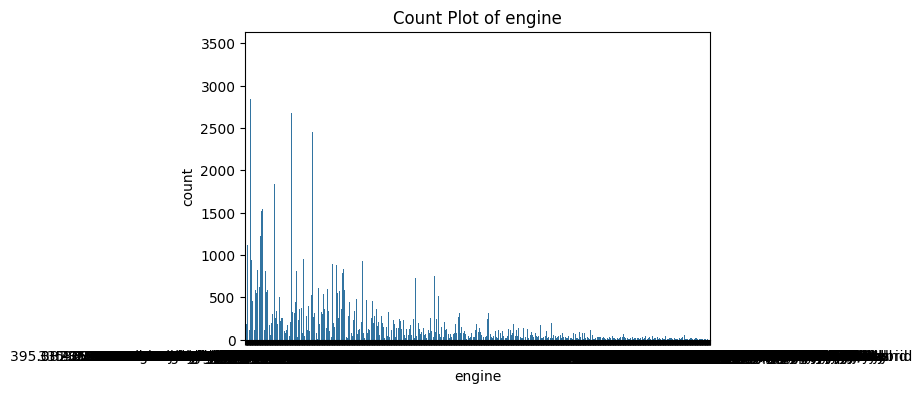

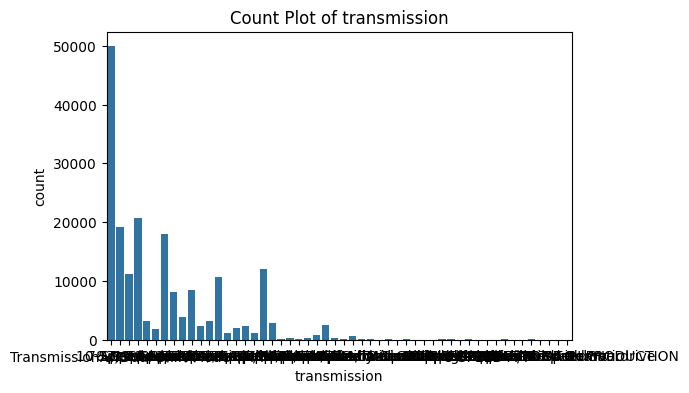

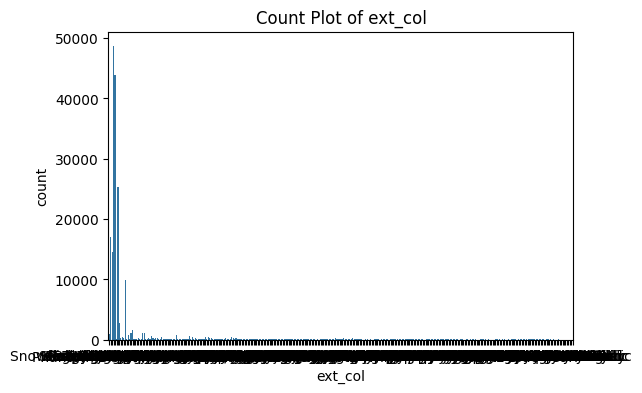

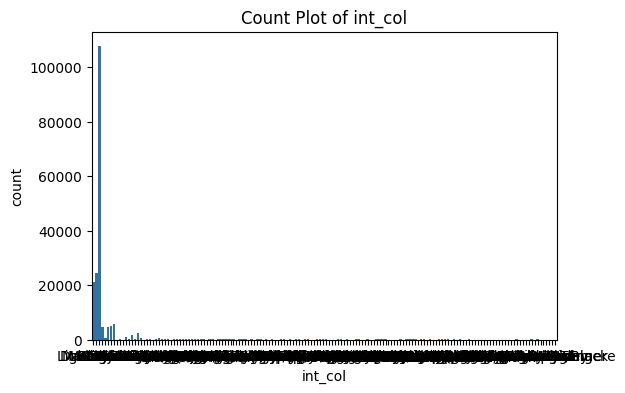

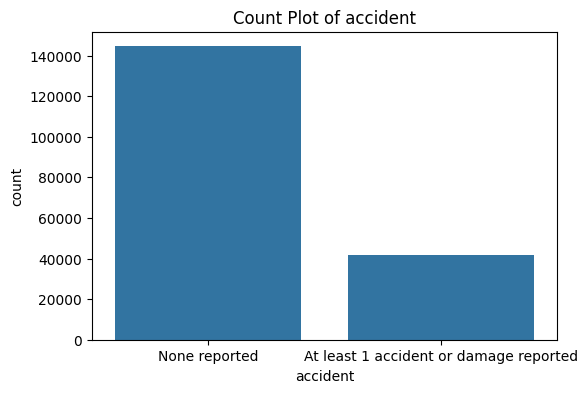

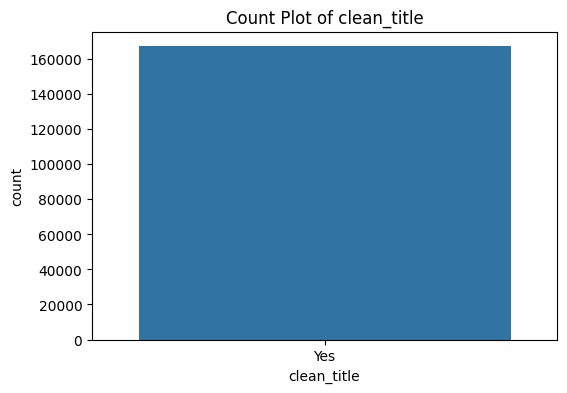

In [13]:
for column in obj_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=train_data)
    plt.title(f'Count Plot of {column}')
    plt.show()

In [14]:
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [15]:
test_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [16]:
train_data.duplicated().sum()

0

In [17]:
test_data.duplicated().sum()

0

In [18]:
temp_data = train_data.isna().sum()

missing_data = temp_data[temp_data > 0]
missing_columns = missing_data.index
print(missing_columns)

Index(['fuel_type', 'accident', 'clean_title'], dtype='object')


In [19]:
train_data[missing_columns].head()

,fuel_type,accident,clean_title
0,Gasoline,None reported,Yes
1,Gasoline,At least 1 accident or damage reported,Yes
2,E85 Flex Fuel,None reported,Yes
3,Gasoline,None reported,Yes
4,Gasoline,None reported,Yes


In [20]:
train_data['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [21]:
train_data.drop(columns=['clean_title'], inplace=True)

In [22]:
missing_columns = missing_columns.drop('clean_title')

In [23]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(strategy='most_frequent')
train_data[missing_columns] = imputer_mode.fit_transform(train_data[missing_columns])
test_data[missing_columns] = imputer_mode.transform(test_data[missing_columns])

In [24]:
train_data.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
dtype: int64

# Feature Engineering

In [25]:
obj_col = train_data.select_dtypes(exclude=np.number).columns

In [26]:
for col in obj_col:
  train_data[col] = train_data[col].str.lower()
  test_data[col] = test_data[col].str.lower()

In [27]:
train_data['engine'].head()

0         172.0hp 1.6l 4 cylinder engine gasoline fuel
1         252.0hp 3.9l 8 cylinder engine gasoline fuel
2    320.0hp 5.3l 8 cylinder engine flex fuel capab...
3         420.0hp 5.0l 8 cylinder engine gasoline fuel
4         208.0hp 2.0l 4 cylinder engine gasoline fuel
Name: engine, dtype: object

In [28]:
train_data['engine_split'] = train_data['engine'].apply(lambda x: x.split())
test_data['engine_split'] = test_data['engine'].apply(lambda x: x.split())

In [ ]:
for i in range(len(train_data)):
  if 'hp' in train_data['engine_split'][i][0]:
     train_data.loc[i, 'hp'] = train_data['engine_split'][i][0]
     del train_data['engine_split'][i][0]
  else:
    train_data.loc[i, 'hp'] = np.nan

for i in range(len(train_data)):
  if 'l' in train_data['engine_split'][i][0]:
    train_data.loc[i, 'liter'] = train_data['engine_split'][i][0]
    del train_data['engine_split'][i][0]
  else:
    train_data.loc[i, 'liter'] = np.nan

In [30]:
# Test Dataset

for i in range(len(test_data)):
  if 'hp' in test_data['engine_split'][i][0]:
    test_data.loc[i, 'hp'] = test_data['engine_split'][i][0]
    del test_data['engine_split'][i][0]
  else:
    test_data.loc[i, 'hp'] = np.nan


for i in range(len(test_data)):
  if 'l' in test_data['engine_split'][i][0]:
    test_data.loc[i, 'liter'] = test_data['engine_split'][i][0]
    del test_data['engine_split'][i][0]
  else:
    test_data.loc[i, 'liter'] = np.nan

In [31]:
train_data['hp'].replace('hp', '', regex=True, inplace=True)
train_data['liter'].replace('l', '', regex=True, inplace=True)

test_data['hp'].replace('hp', '', regex=True, inplace=True)
test_data['liter'].replace('l', '', regex=True, inplace=True)

In [32]:
train_data.drop(['engine', 'engine_split'], axis=1, inplace=True)
test_data.drop(['engine', 'engine_split'], axis=1, inplace=True)

In [33]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,hp,liter
0,0,mini,cooper s base,2007,213000,gasoline,a/t,yellow,gray,none reported,4200,172.0,1.6
1,1,lincoln,ls v8,2002,143250,gasoline,a/t,silver,beige,at least 1 accident or damage reported,4999,252.0,3.9
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,a/t,blue,gray,none reported,13900,320.0,5.3
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,transmission w/dual shift mode,black,black,none reported,45000,420.0,5.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,7-speed a/t,black,beige,none reported,97500,208.0,2.0


In [34]:
# Display max possible values
pd.set_option('display.max_rows', None)

In [35]:
train_data['liter'].value_counts()

liter
3.0           23929
3.5           21216
2.0           20486
6.2           10831
4.0           10592
3.6            9820
2.5            6798
5.3            6479
5.7            6164
5.0            5958
eectric        5379
3.8            5301
4.6            4032
4.4            3782
3.7            3448
2.4            3323
4.7            2833
2.7            2709
6.7            2456
6.0            2223
5.5            1841
2.3            1642
5.6            1536
1.8            1523
1.6            1516
3.2            1318
3.3            1279
4.8            1223
6.4            1050
3.4            1031
5.4            1017
5.2             978
6.6             932
2.9             625
4.2             603
1.5             558
3.9             467
4.3             454
1.4             370
6.8             272
6.3             232
6.5             181
7.3             177
1.3             146
dua             132
2.2             127
2.8             121
5.9             106
7.0             105
6.1           

In [36]:
train_data['liter'] = train_data['liter'].replace('eectric', np.nan)
train_data['liter'] = train_data['liter'].replace('intercooed', np.nan)
train_data['liter'] = train_data['liter'].replace('dua', np.nan)

In [37]:
test_data['liter'].value_counts()

liter
3.0           15879
3.5           14071
2.0           13734
6.2            7092
4.0            7057
3.6            6704
2.5            4658
5.3            4134
5.7            4085
5.0            3944
eectric        3510
3.8            3509
4.6            2710
4.4            2590
3.7            2361
2.4            2240
4.7            1999
2.7            1765
6.7            1642
6.0            1492
5.5            1181
2.3            1112
1.6            1018
1.8            1003
5.6             995
3.3             904
3.2             873
4.8             821
3.4             740
5.4             713
6.4             690
5.2             614
6.6             612
2.9             407
4.2             384
1.5             367
3.9             307
4.3             294
1.4             205
6.8             198
6.3             195
6.5             130
7.3             112
dua              94
2.8              86
7.0              86
1.3              83
2.2              72
5.9              71
6.1           

In [38]:
test_data['liter'] = test_data['liter'].replace('eectric', np.nan)
test_data['liter'] = test_data['liter'].replace('intercooed', np.nan)
test_data['liter'] = test_data['liter'].replace('dua', np.nan)

In [39]:
train_data['hp'] = train_data['hp'].astype(float)
train_data['liter'] = train_data['liter'].astype(float)

test_data['hp'] = test_data['hp'].astype(float)
test_data['liter'] = test_data['liter'].astype(float)

In [40]:
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
transmission        0
ext_col             0
int_col             0
accident            0
price               0
hp              33259
liter           14214
dtype: int64

In [41]:
mean_hp = int(train_data['hp'].mean())
train_data['hp'].fillna(mean_hp, inplace=True)

mean_hp_test = int(test_data['hp'].mean())
test_data['hp'].fillna(mean_hp_test, inplace=True)

mean_liter = train_data['liter'].mean()
train_data['liter'].fillna(mean_liter, inplace=True)

mean_liter_test = test_data['liter'].mean()
test_data['liter'].fillna(mean_liter_test, inplace=True)

# Data Encoding

In [42]:
obj_col = train_data.select_dtypes(exclude=np.number).columns

In [43]:
train_data[obj_col].head()

,brand,model,fuel_type,transmission,ext_col,int_col,accident
0,mini,cooper s base,gasoline,a/t,yellow,gray,none reported
1,lincoln,ls v8,gasoline,a/t,silver,beige,at least 1 accident or damage reported
2,chevrolet,silverado 2500 lt,e85 flex fuel,a/t,blue,gray,none reported
3,genesis,g90 5.0 ultimate,gasoline,transmission w/dual shift mode,black,black,none reported
4,mercedes-benz,metris base,gasoline,7-speed a/t,black,beige,none reported


In [44]:
train_data[obj_col].describe()

,brand,model,fuel_type,transmission,ext_col,int_col,accident
count,188533,188533,188533,188533,188533,188533,188533
unique,57,1893,7,51,317,152,2
top,ford,f-150 xlt,gasoline,a/t,black,black,none reported
freq,23088,2945,171023,49904,48687,107707,146966


In [45]:
from sklearn.preprocessing import LabelEncoder
for col in obj_col:
  label_encoder = LabelEncoder()
  train_data[col] = label_encoder.fit_transform(train_data[col])
  test_data[col] = label_encoder.fit_transform(test_data[col])

In [46]:
train_data[obj_col].head()

,brand,model,fuel_type,transmission,ext_col,int_col,accident
0,37,460,2,37,313,69,1
1,28,961,2,37,264,8,0
2,9,1556,1,37,36,69,1
3,15,761,2,48,26,12,1
4,35,1063,2,23,26,8,1


In [63]:
test_data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,hp,liter
0,188533,26,1365,3.000000,46.104363,2,16,303,8,1,Yes,15.491933,0.238095
1,188534,26,1352,2.000000,20.909665,3,29,262,12,1,Yes,19.874607,0.357143
2,188535,14,642,1.414214,30.409568,2,3,303,55,1,NaN,18.493242,0.416667
3,188536,3,182,2.828427,39.420392,2,38,260,12,1,NaN,18.493242,0.452560
4,188537,3,181,2.449490,38.929964,2,37,128,12,1,Yes,15.874508,0.238095


# Data Transformation

In [47]:
num_col = train_data.select_dtypes(include=np.number).columns
num_col

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'price', 'hp',
       'liter'],
      dtype='object')

In [48]:
num_col = num_col[1:]
num_col

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'ext_col', 'int_col', 'accident', 'price', 'hp', 'liter'],
      dtype='object')

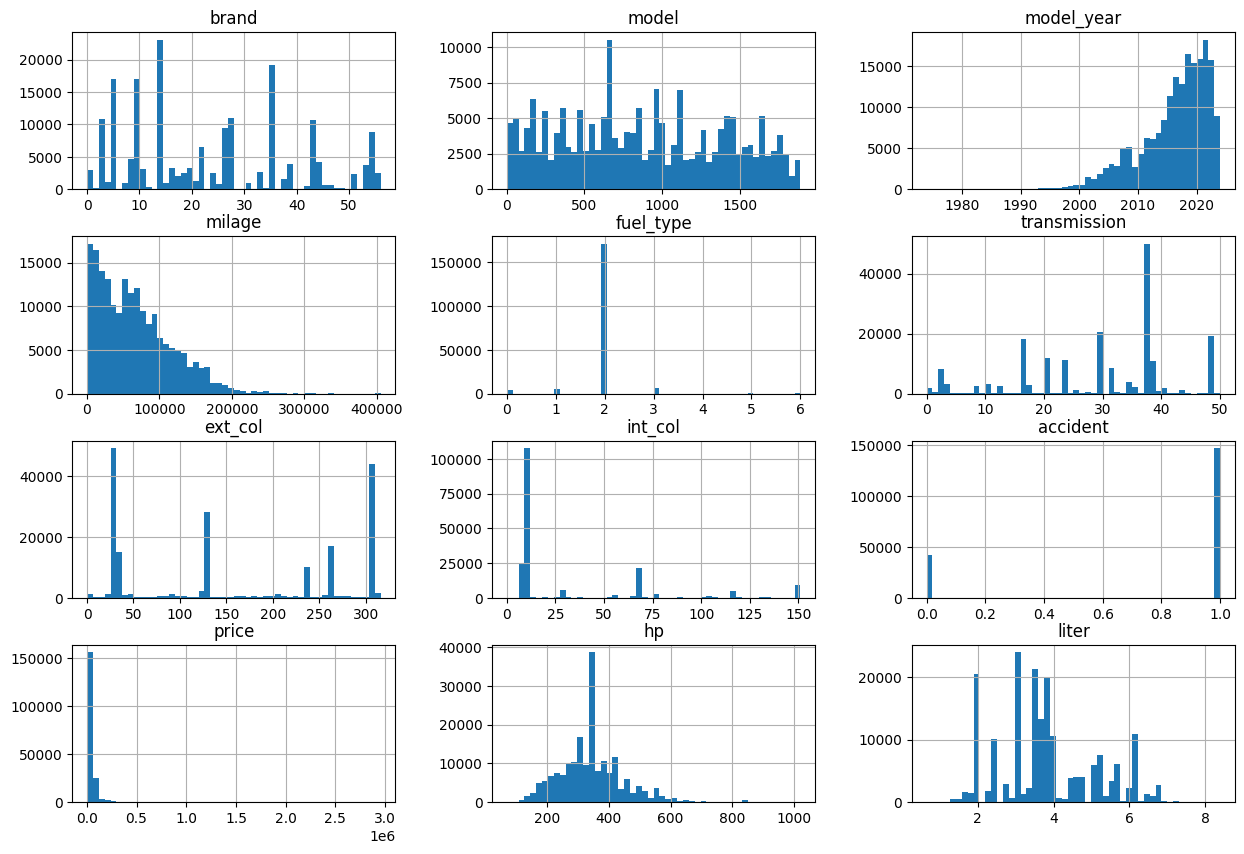

In [49]:
train_data[num_col].hist(figsize=(15, 10), bins=50);
plt.show()

In [50]:
max = np.max(train_data['liter'])

train_data['liter'] = train_data['liter']/max



max_test = np.max(test_data['liter'])

test_data['liter'] = test_data['liter']/max_test

In [51]:
train_data['model_year'] = 2024 - train_data['model_year']
test_data['model_year'] = 2024 - test_data['model_year']

train_data['milage'] = np.cbrt(train_data['milage'])
train_data['hp'] = np.sqrt(train_data['hp'])

train_data['price'] = np.log(train_data['price'])

In [52]:
test_data['milage'] = np.cbrt(test_data['milage'])
test_data['hp'] = np.sqrt(test_data['hp'])



In [53]:
train_data['model_year'] = np.sqrt(train_data['model_year'])
test_data['model_year'] = np.sqrt(test_data['model_year'])

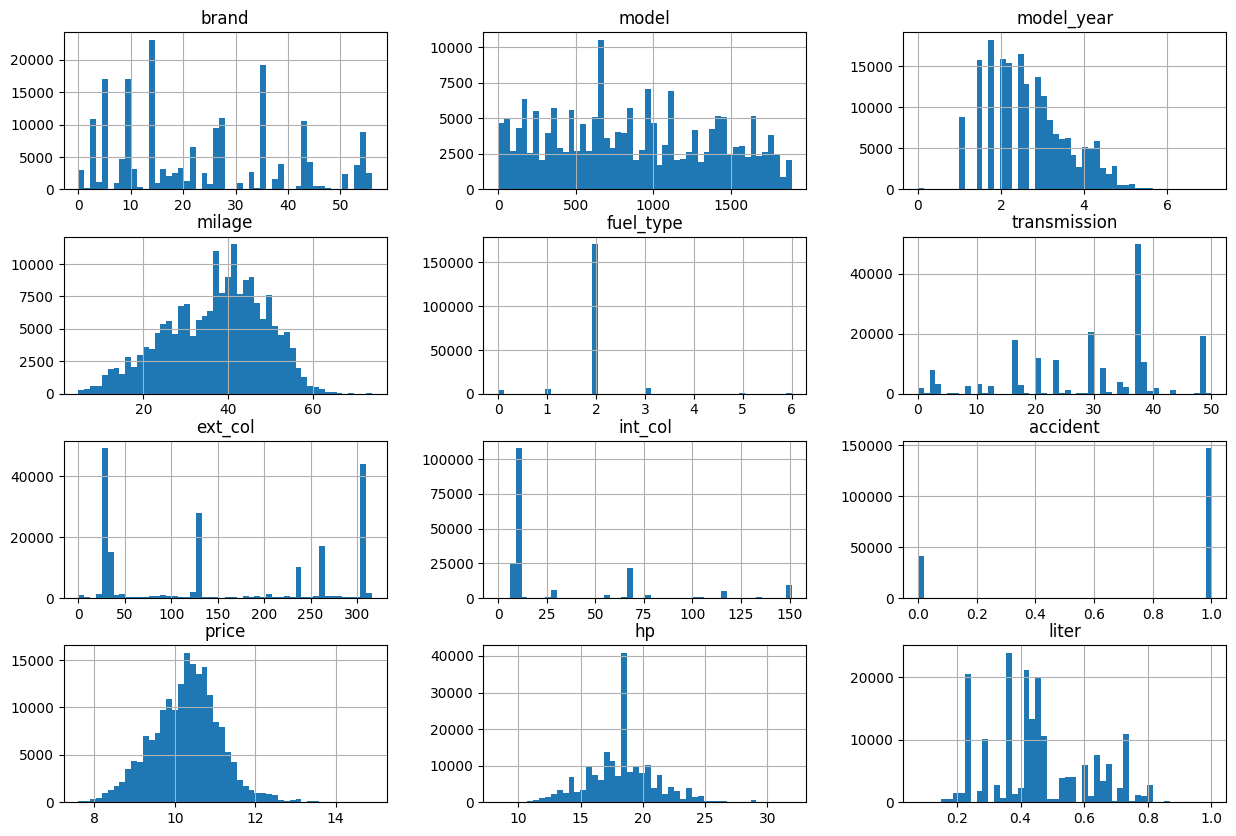

In [54]:
train_data[num_col].hist(figsize=(15, 10), bins=50);
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 10))

In [56]:
train_data.dtypes


id                int64
brand             int32
model             int32
model_year      float64
milage          float64
fuel_type         int32
transmission      int32
ext_col           int32
int_col           int32
accident          int32
price           float64
hp              float64
liter           float64
dtype: object

In [57]:
scaled_data = scaler.fit_transform(train_data.select_dtypes(include=['float64', 'int64','int32']))
scaled_df = pd.DataFrame(scaled_data, columns=train_data.select_dtypes(include=['float64', 'int64','int32']).columns)


In [58]:
scaled_df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,hp,liter
0,1.000000,6.946429,3.188161,6.247857,8.148542,4.0,7.66,9.914557,5.112583,10.0,1.914993,2.813024,2.103226
1,1.000048,5.500000,5.571353,6.969925,7.188480,4.0,7.66,8.518987,1.476821,1.0,2.129768,3.866727,4.774194
2,1.000095,2.446429,8.401691,6.969925,7.083864,2.5,7.66,2.025316,5.112583,10.0,3.390951,4.635742,6.400000
3,1.000143,3.410714,4.619979,4.367492,3.890921,4.0,9.64,1.740506,1.715232,10.0,4.839740,5.630540,6.051613
4,1.000191,6.625000,6.056554,3.204541,2.925357,4.0,5.14,1.740506,1.476821,10.0,5.793275,3.312198,2.567742


In [60]:
test_data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,hp,liter
0,188533,26,1365,3.000000,46.104363,2,16,303,8,1,Yes,15.491933,0.238095
1,188534,26,1352,2.000000,20.909665,3,29,262,12,1,Yes,19.874607,0.357143
2,188535,14,642,1.414214,30.409568,2,3,303,55,1,NaN,18.493242,0.416667
3,188536,3,182,2.828427,39.420392,2,38,260,12,1,NaN,18.493242,0.452560
4,188537,3,181,2.449490,38.929964,2,37,128,12,1,Yes,15.874508,0.238095


In [64]:
scaled_data_test = scaler.fit_transform(test_data.select_dtypes(include=['float64', 'int64','int32']))
scaled_df_test = pd.DataFrame(scaled_data_test, columns=test_data.select_dtypes(include=['float64', 'int64','int32']).columns)


In [65]:
scaled_df_test.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,hp,liter
0,1.000000,5.333333,7.513786,4.818377,6.381299,4.0,3.88,9.684713,1.476821,10.0,3.720650,2.567742
1,1.000072,5.333333,7.451750,3.545584,3.111373,5.5,6.22,8.509554,1.715232,10.0,5.394076,3.729032
2,1.000143,3.333333,4.063627,2.800000,4.344330,4.0,1.54,9.684713,4.278146,10.0,4.866633,4.309677
3,1.000215,1.500000,1.868505,4.600000,5.513811,4.0,7.84,8.452229,1.715232,10.0,4.866633,4.659810
4,1.000286,1.500000,1.863733,4.117691,5.450161,4.0,7.66,4.668790,1.715232,10.0,3.866727,2.567742


In [66]:
test_data.dtypes

id                int64
brand             int32
model             int32
model_year      float64
milage          float64
fuel_type         int32
transmission      int32
ext_col           int32
int_col           int32
accident          int32
clean_title      object
hp              float64
liter           float64
dtype: object

In [67]:
# scaled_df['model_year'] = scaled_df['model_year'].fillna(scaled_df['model_year'].mean())
# scaled_df_test['model_year'] = scaled_df_test['model_year'].fillna(scaled_df_test['model_year'].mean())

# Model Training

In [68]:
X = scaled_df.drop(['price', 'id'], axis=1)
y = scaled_df['price']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
###  Linear Regression ######################
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
############### Random forest ##############
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(n_estimators=100, random_state=42)
rand.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_test = model.predict(X_test)
pred_rand = rand.predict(X_test)
# MAE
mae = mean_absolute_error(y_test, y_pred_test)
mae2=mean_absolute_error(y_test, pred_rand)
# MSE
mse = mean_squared_error(y_test, y_pred_test)
mse2 = mean_squared_error(y_test, pred_rand)
# RMSE
rmse = np.sqrt(mse)
rmse2=np.sqrt(mse2)
# R-squared
r2 = r2_score(y_test, y_pred_test)
r=r2_score(y_test, pred_rand)
print(f"Validation Metrics by linear regression model:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

print(f"Validation Metrics by Random forest model:")
print(f"MAE: {mae2}")
print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")
print(f"R-squared: {r}")

Validation Metrics by linear regression model:
MAE: 0.4713750503903064
MSE: 0.43351387485378656
RMSE: 0.6584177054528428
R-squared: 0.5994351400527549
Validation Metrics by Random forest model:
MAE: 0.4449670747758862
MSE: 0.3946457390878459
RMSE: 0.6282083564294938
R-squared: 0.6353491217326852


In [71]:
test = scaled_df_test.drop(['id'], axis=1)


In [73]:
test_scaled = scaler.fit_transform(test)

In [74]:
pred_lin = model.predict(test_scaled)
pred_rand=rand.predict(test_scaled)

In [77]:
output = pd.DataFrame({'id': test_data['id'], 'price': pred_lin})
output.to_csv('submission_linear_model.csv', index=False)
print("Submission file saved")

Submission file saved


In [78]:
output = pd.DataFrame({'id': test_data['id'], 'price': pred_rand})
output.to_csv('submission_Random_forest_model.csv', index=False)